In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

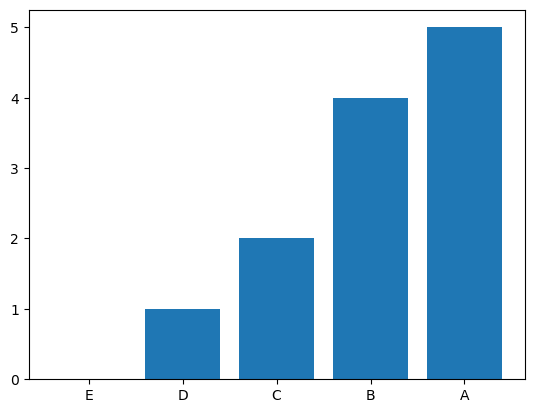

In [12]:
fig, ax = plt.subplots()

labels = ["E", "D", "C", "B", "A"]
data = [0, 1, 2, 4, 5]

ax.bar(labels, data)

In [2]:
housing_raw = pd.read_csv("D:/STUDIES/Data Visualization/Data/housing_data.csv", 
                          parse_dates=['period_begin', 'period_end'], 
                          dtype={'total_homes_sold':'Int32', 'region_name': 'category'})

In [13]:
ca_housing = (housing_raw.loc[housing_raw['region_name'].str.contains("CA")]\
.assign(region_name = housing_raw['region_name'].str[0:-11]).set_index("period_begin").sort_index())

ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [19]:
total_sold = (ca_housing.groupby("region_name").agg({"total_homes_sold":"sum"}).sort_values("total_homes_sold", ascending=False).iloc[:10])
total_sold.head()

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
Riverside,2335243
Orange,2004799
San Bernardino,1705727


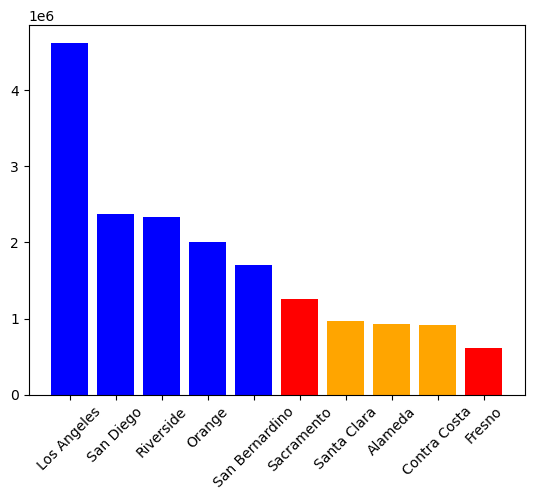

In [27]:
fig, ax = plt.subplots()

colors = ["blue", "blue", "blue", "blue", "blue", "red", "orange", "orange", "orange", "red"]

ax.bar(total_sold.index, total_sold['total_homes_sold'], color = colors)

plt.xticks(rotation = 45);

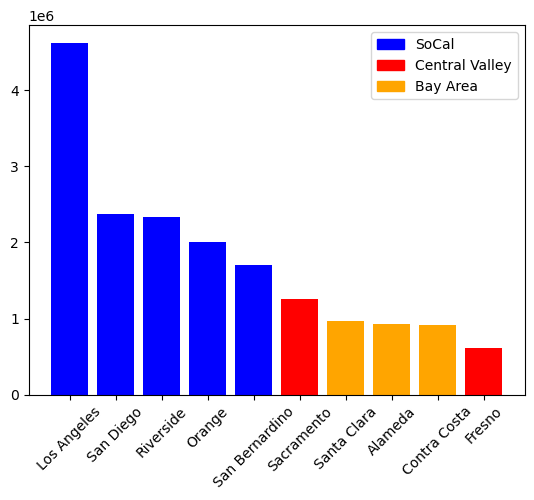

In [29]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

colors = ["blue", "blue", "blue", "blue", "blue", "red", "orange", "orange", "orange", "red"]

ax.bar(total_sold.index, total_sold['total_homes_sold'], color = colors)


socal = mpatches.Patch(color = "blue", label = "SoCal")
central = mpatches.Patch(color = "red", label = "Central Valley")
bay = mpatches.Patch(color = "orange", label = "Bay Area")

plt.legend(handles=[socal, central, bay], loc="upper right")
plt.xticks(rotation = 45);